In [43]:
import pandas as pd
import sklearn
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_regression
import sklearn.feature_selection as fs
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

In [44]:
df = pd.read_csv("dataset_phishing.csv")
#df = df.drop("id",axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11430 entries, 0 to 11429
Data columns (total 89 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   url                         11430 non-null  object 
 1   length_url                  11430 non-null  int64  
 2   length_hostname             11430 non-null  int64  
 3   ip                          11430 non-null  int64  
 4   nb_dots                     11430 non-null  int64  
 5   nb_hyphens                  11430 non-null  int64  
 6   nb_at                       11430 non-null  int64  
 7   nb_qm                       11430 non-null  int64  
 8   nb_and                      11430 non-null  int64  
 9   nb_or                       11430 non-null  int64  
 10  nb_eq                       11430 non-null  int64  
 11  nb_underscore               11430 non-null  int64  
 12  nb_tilde                    11430 non-null  int64  
 13  nb_percent                  114

<AxesSubplot:>

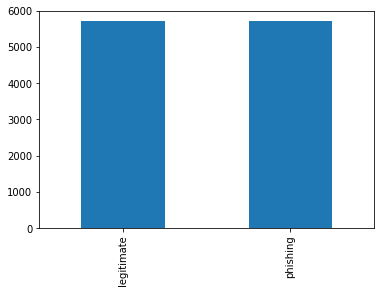

In [45]:
# Checking the dataset is balanced or not
df['status'].value_counts().plot(kind='bar')

In [102]:
df.isna().sum().sum()

0

In [46]:
df = df.drop("url",axis = 1)
X = df.drop("status",axis = 1) # independant feature
X = df
Y = df["status"]  # dependant feature

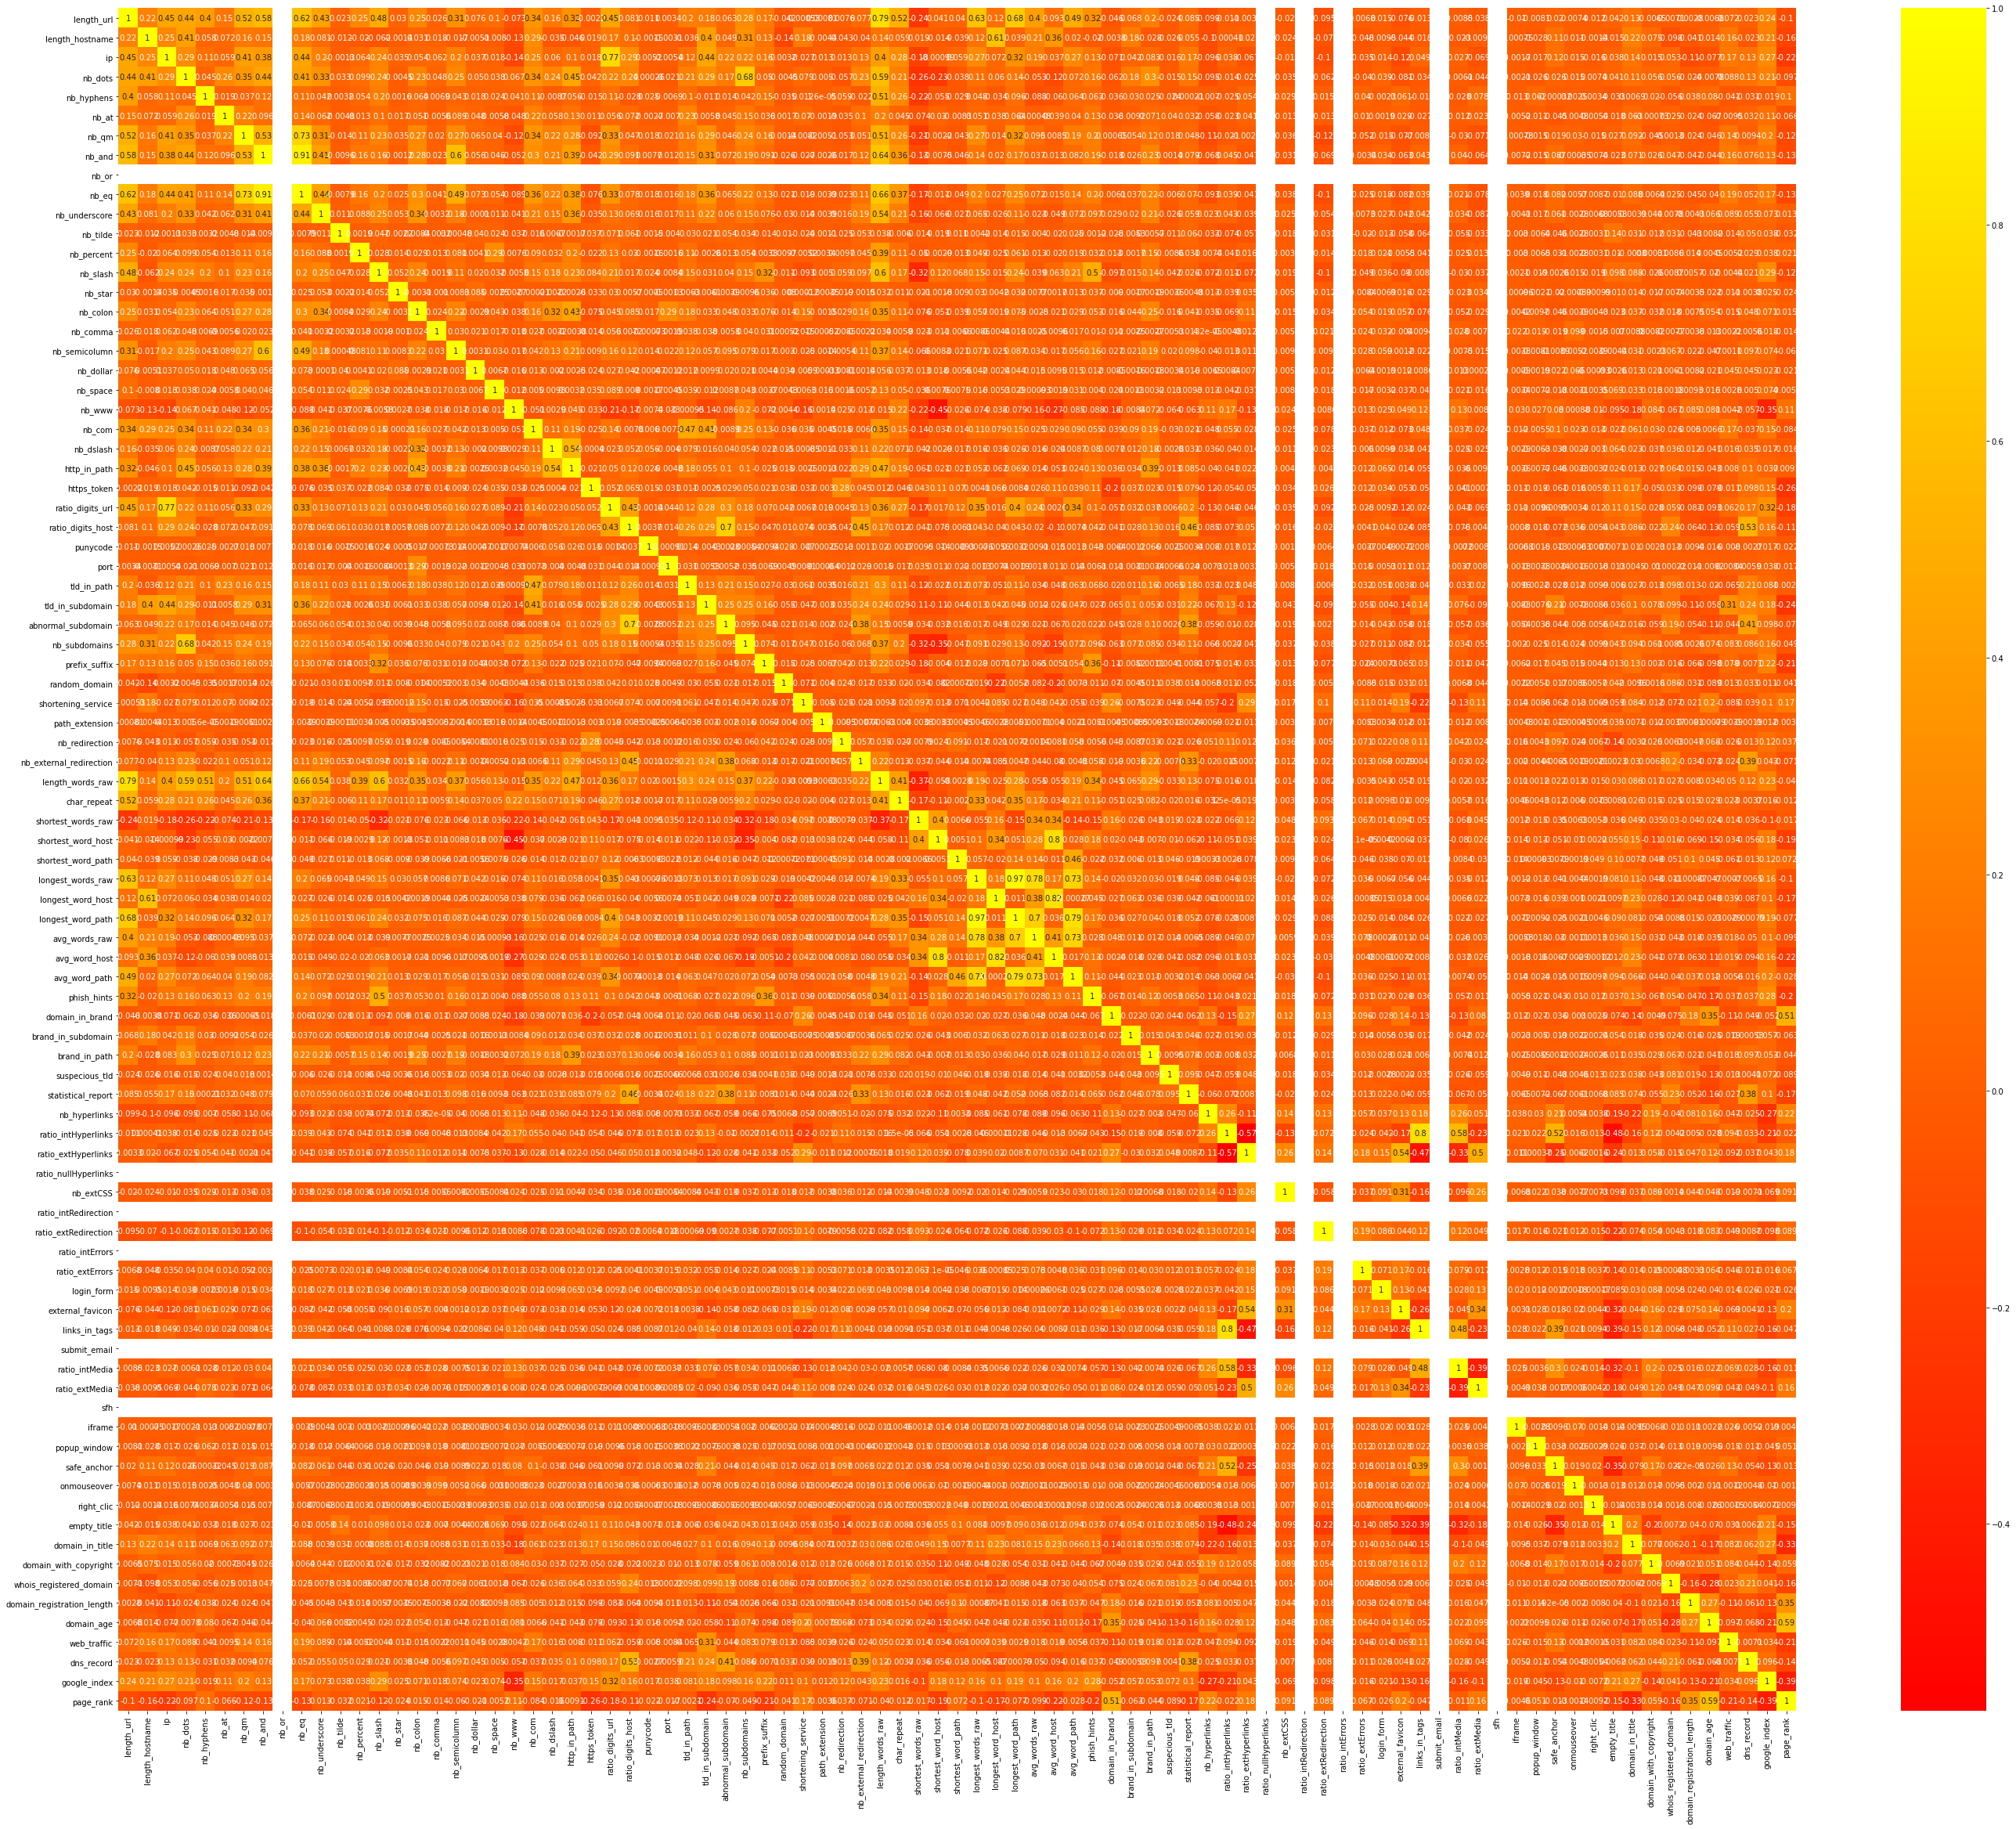

In [47]:

#X = df.drop("CLASS_LABEL",axis = 1) # independant feature
#Y = df["CLASS_LABEL"]  # dependant feature
#X_train, X_test, y_train, y_test = train_test_split(
plt.figure(figsize = (48,40))
cor = X.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.autumn)
plt.show()

In [48]:
def correlation(dataset, threshold):
    col_corr = set()
    correlation_matrix = dataset.corr()
    for i in range(len(correlation_matrix.columns)):
        for j in range(i):
            if abs(correlation_matrix.iloc[i, j]) >  threshold:
                columnName = correlation_matrix.columns[i]
                col_corr.add(columnName)
    return col_corr
    

In [49]:
correlated_features = correlation(X,.7)
correlated_features

{'abnormal_subdomain',
 'avg_word_host',
 'avg_word_path',
 'avg_words_raw',
 'length_words_raw',
 'links_in_tags',
 'longest_word_path',
 'nb_eq',
 'ratio_digits_url'}

In [50]:
X = X.drop(correlated_features, axis=1) # Run this block only once
df = X

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11430 entries, 0 to 11429
Data columns (total 79 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   length_url                  11430 non-null  int64  
 1   length_hostname             11430 non-null  int64  
 2   ip                          11430 non-null  int64  
 3   nb_dots                     11430 non-null  int64  
 4   nb_hyphens                  11430 non-null  int64  
 5   nb_at                       11430 non-null  int64  
 6   nb_qm                       11430 non-null  int64  
 7   nb_and                      11430 non-null  int64  
 8   nb_or                       11430 non-null  int64  
 9   nb_underscore               11430 non-null  int64  
 10  nb_tilde                    11430 non-null  int64  
 11  nb_percent                  11430 non-null  int64  
 12  nb_slash                    11430 non-null  int64  
 13  nb_star                     114

In [14]:
df

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_underscore,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,37,19,0,3,0,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,legitimate
1,77,23,1,1,0,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,phishing
2,126,50,1,4,1,0,1,2,0,2,...,1,0,0,14,4004,5828815,0,1,0,phishing
3,18,11,0,2,0,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,legitimate
4,55,15,0,2,2,0,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,legitimate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11425,45,17,0,2,0,0,0,0,0,0,...,0,0,0,448,5396,3980,0,0,6,legitimate
11426,84,18,0,5,0,1,1,0,0,0,...,1,0,0,211,6728,0,0,1,0,phishing
11427,105,16,1,2,6,0,1,0,0,1,...,0,0,0,2809,8515,8,0,1,10,legitimate
11428,38,30,0,2,0,0,0,0,0,0,...,1,0,0,85,2836,2455493,0,0,4,legitimate


In [115]:
def getMutualInformationScore(x,y):
    mi_scores=mutual_info_regression(x,y,random_state=0)
    mi_scores=pd.Series(mi_scores,index=x.columns)
    mi_scores=mi_scores.sort_values(ascending=True)
    return mi_scores

In [116]:
mi=getMutualInformationScore(df,Y)
plt.figure(figsize=(18,18))
plt.barh(mi.index,mi.values)
plt.show()

ValueError: could not convert string to float: 'legitimate'

In [32]:
X= df
y =Y
df

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_underscore,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,37,19,0,3,0,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,legitimate
1,77,23,1,1,0,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,phishing
2,126,50,1,4,1,0,1,2,0,2,...,1,0,0,14,4004,5828815,0,1,0,phishing
3,18,11,0,2,0,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,legitimate
4,55,15,0,2,2,0,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,legitimate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11425,45,17,0,2,0,0,0,0,0,0,...,0,0,0,448,5396,3980,0,0,6,legitimate
11426,84,18,0,5,0,1,1,0,0,0,...,1,0,0,211,6728,0,0,1,0,phishing
11427,105,16,1,2,6,0,1,0,0,1,...,0,0,0,2809,8515,8,0,1,10,legitimate
11428,38,30,0,2,0,0,0,0,0,0,...,1,0,0,85,2836,2455493,0,0,4,legitimate


In [16]:
y.isnull().values.any()
 np.std(X, axis=0) == 0

IndentationError: unexpected indent (<ipython-input-16-04f80873589e>, line 2)

In [53]:
X = X.drop("status",axis=1)

In [54]:
print('sklearn: %s' % sklearn.__version__)
le = LabelEncoder()
y = le.fit_transform(y)

sklearn: 0.23.2


In [55]:
#removing columns with constant values
selector = fs.VarianceThreshold(threshold=0)
selector.fit(X)


VarianceThreshold(threshold=0)

In [56]:
concol = [column for column in X.columns 
          if column not in X.columns[selector.get_support()]]

X= X.drop(concol,axis =1)
X

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_underscore,nb_tilde,...,empty_title,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank
0,37,19,0,3,0,0,0,0,0,0,...,0,0,1,0,45,-1,0,1,1,4
1,77,23,1,1,0,0,0,0,0,0,...,0,1,0,0,77,5767,0,0,1,2
2,126,50,1,4,1,0,1,2,2,0,...,0,1,0,0,14,4004,5828815,0,1,0
3,18,11,0,2,0,0,0,0,0,0,...,0,1,0,0,62,-1,107721,0,0,3
4,55,15,0,2,2,0,0,0,0,0,...,0,0,1,0,224,8175,8725,0,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11425,45,17,0,2,0,0,0,0,0,0,...,0,0,0,0,448,5396,3980,0,0,6
11426,84,18,0,5,0,1,1,0,0,0,...,0,1,0,0,211,6728,0,0,1,0
11427,105,16,1,2,6,0,1,0,1,0,...,0,0,0,0,2809,8515,8,0,1,10
11428,38,30,0,2,0,0,0,0,0,0,...,0,1,0,0,85,2836,2455493,0,0,4


In [24]:
# f1_scores = []
# le = LabelEncoder()
# y = le.fit_transform(y)
# for i in range(1,40):
#     bestFeatures = fs.SelectKBest(score_func=fs.f_classif,k=i)
#     fit = bestFeatures.fit(X,y)
#     X_trans = bestFeatures.transform(X)
# # Get columns to keep and create new dataframe with those only
#     cols = bestFeatures.get_support(indices=True)
# #X.columns[cols]
# #features_df_new = X.iloc[:,cols]
# #features_df_new
    
   
#     train_x, X_test, train_y, y_test = train_test_split(X_trans, y, test_size=0.33)
#     lr = LogisticRegression(max_iter=100) 
#     lr.fit(train_x, train_y)
#     y_pred = lr.predict(X_test)
#     f1 = metrics.f1_score(y_test, y_pred)
#     f1_scores.append(f1)
# f1_scores

In [25]:

# fig, axe = plt.subplots(dpi = 300)
# axe.plot(range(1, 40), f1_scores)
# axe.set_xlabel("best k features")
# axe.set_ylabel("F1-score")

# plt.show()

In [71]:
bestFeatures = fs.SelectKBest(score_func=fs.f_classif,k=10)
fit = bestFeatures.fit(X,y)
cols = bestFeatures.get_support(indices=True)
X.columns[cols]
features_df_new = X.iloc[:,cols]
features_df_new

,length_url,ip,nb_qm,nb_www,phish_hints,nb_hyperlinks,domain_in_title,domain_age,google_index,page_rank
0,37,0,0,1,0,17,0,-1,1,4
1,77,1,0,0,0,30,1,5767,1,2
2,126,1,1,0,0,4,1,4004,1,0
3,18,0,0,0,0,149,1,-1,0,3
4,55,0,0,1,0,102,0,8175,0,6
...,...,...,...,...,...,...,...,...,...,...
11425,45,0,0,1,0,199,0,5396,0,6
11426,84,0,1,1,0,3,1,6728,1,0
11427,105,1,1,1,0,68,0,8515,1,10
11428,38,0,0,1,0,32,1,2836,0,4


In [30]:
y

array([0, 1, 1, ..., 0, 0, 1], dtype=int64)

In [57]:

train_x, X_test, train_y, y_test = train_test_split(X, y, test_size=0.33)

In [58]:
model = RandomForestClassifier(n_estimators=10,random_state=30)
model

RandomForestClassifier(n_estimators=10, random_state=30)

In [59]:
model.fit(train_x,train_y)
prediction= model.predict(X_test)

In [60]:
print("Accuracy = ",metrics.accuracy_score(y_test,prediction))

Accuracy =  0.9512195121951219


In [61]:
feature_list = list(X.columns)
feature_importances = pd.Series(model.feature_importances_,index=feature_list).sort_values(ascending=False)

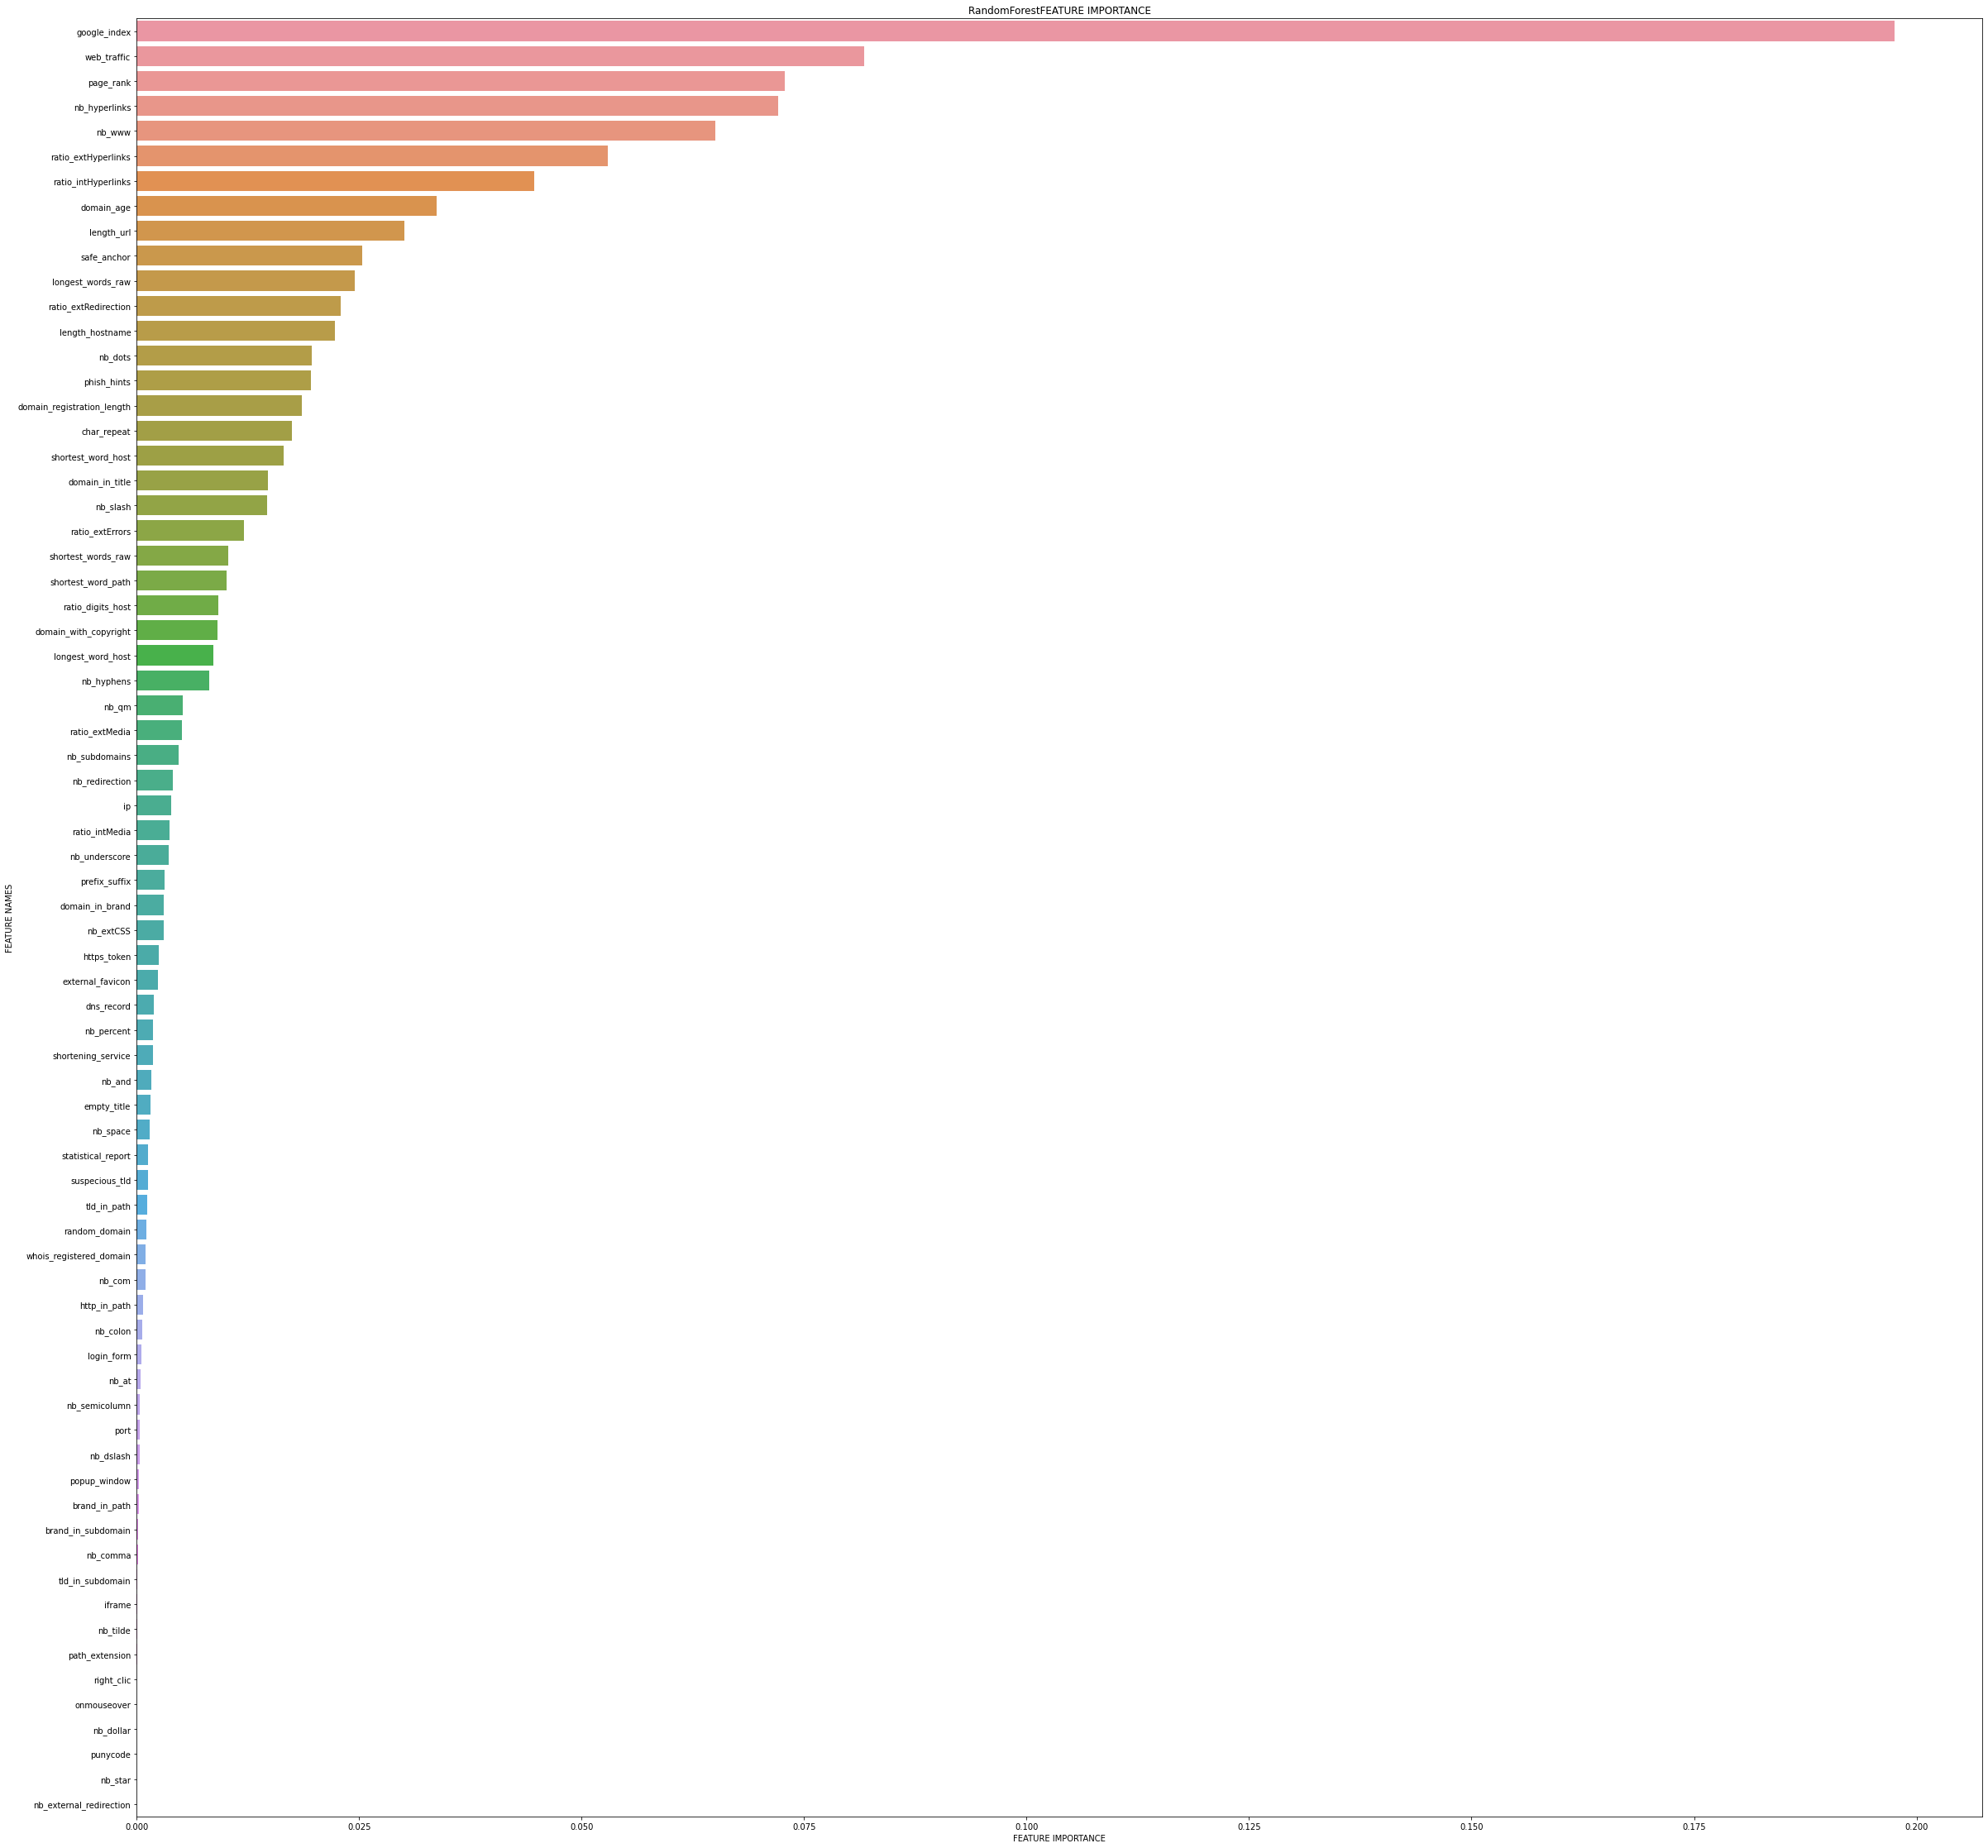

In [69]:
plot_feature_importance(model.feature_importances_,feature_list,"RandomForest")

In [68]:
def plot_feature_importance(importance,names,model_type):

    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    #Define size of bar plot
    plt.figure(figsize=(40,40))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title(model_type + 'FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')